In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from pathlib import Path
from common.constants import CV_DATA_DIR

In [ ]:
# Set a seed to make results are consistent
np.random.seed(3)

In [ ]:
def layer_sizes(X: np.ndarray, Y: np.ndarray):
    """
    Returns the size of each layer of the neural network
    :param X: input dataset of shape (n, m)
    :param Y: labels of shape (k, m)
    :return: sizes of each layer of the neural network
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y

In [ ]:
def initialize_parameters(n_x: int, n_y: int):
    """
    Initialize the parameters of the neural network
    :param n_x: the size input layer
    :param n_y: the size of output layer
    :return: parameters of the neural network (W - weights matrix of shape (n_x, n_y), b - bias vector)
    """
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    return {"W": W, "b": b}

In [ ]:
def forward_propagate(X: np.ndarray, parameters: dict):
    """
    Perform forward propagation of the neural network
    :param X: input data of shape (n_x, m)
    :param parameters: parameters of the neural network
    :return: the predicted values of shape (n_x, m)
    """
    W = parameters["W"]
    b = parameters["b"]
    Z = W @ X + b
    Y_hat = Z
    return Y_hat

In [ ]:
def compute_cost(Y_hat: np.ndarray, Y: np.ndarray):
    """
    Compute the cost function of the neural network
    :param Y_hat: the output of the neural network
    :param Y: the "real" labels
    :return: sum of squared scaled by 1/(2 * m)
    """
    m = Y_hat.shape[1]
    cost = np.sum((Y_hat - Y) ** 2) / (2 * m)
    return cost

In [ ]:
def backward_propagate(Y_hat: np.ndarray, X: np.ndarray, Y: np.ndarray):
    """
    Perform backward propagation of the neural network
    :param Y_hat: the output of the neural network
    :param X: input data of shape (n_x, m)
    :param Y: the "real" labels
    :return: gradients of the weights and bias of the neural network
    """
    m = X.shape[1]
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return {"dW": dW, "db": db}

In [ ]:
def update_parameters(parameters: dict, gradients: dict, learning_rate: float = 1.2):
    """
    Update the parameters of the neural network
    :param parameters: current parameters of the neural network
    :param gradients: gradients of the weights and bias of the neural network
    :param learning_rate: learning rate parameters for gradient descent
    :return: new parameters of the neural network
    """
    W = parameters["W"]
    b = parameters["b"]
    dW = gradients["dW"]
    db = gradients["db"]
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return {"W": W, "b": b}

In [ ]:
def nn_model(X: np.ndarray, Y: np.ndarray, num_iterations: int = 10, learning_rate: float = 1.2):
    n_x, n_y = layer_sizes(X, Y)
    print(f"input size: {n_x}, output size: {n_y}")
    parameters = initialize_parameters(n_x, n_y)

    for n in range(0, num_iterations):
        Y_hat = forward_propagate(X, parameters)
        # print(n, "Y_hat", Y_hat)
        cost = compute_cost(Y_hat, Y)
        # print(n, "cost", cost)
        gradients = backward_propagate(Y_hat, X, Y)
        # print(n, "grads", gradients)
        parameters = update_parameters(parameters, gradients, learning_rate)
        # print(n, "parameters", parameters)
        print(f"Cost after <{n}> iteration: {cost:.6}")

    return parameters

In [35]:
def predict(X, Y, parameters: dict, X_pred: np.ndarray):
    W = parameters["W"]
    b = parameters["b"]

    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean) / X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(X.mean()).reshape((len(X.axes[1]),1))
        X_std = np.array(X.std()).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean) / X_std)

    Y_pred_norm = W @ X_pred_norm + b
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    return Y_pred

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


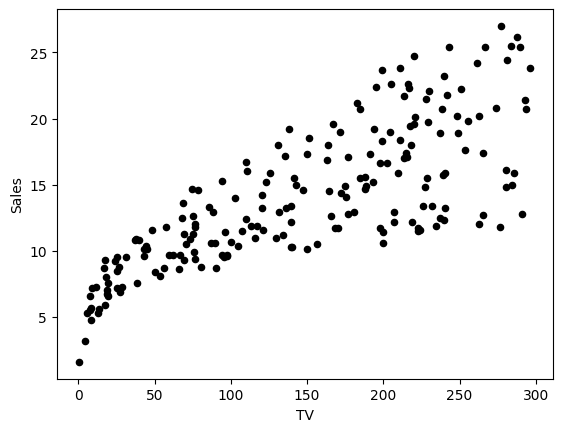

In [27]:
DATA_PATH1 = Path(CV_DATA_DIR, "playground", "tvmarketing.csv")
adv = pd.read_csv(DATA_PATH1)
print(adv.head())
adv.plot(x="TV", y="Sales", kind="scatter", c="black");

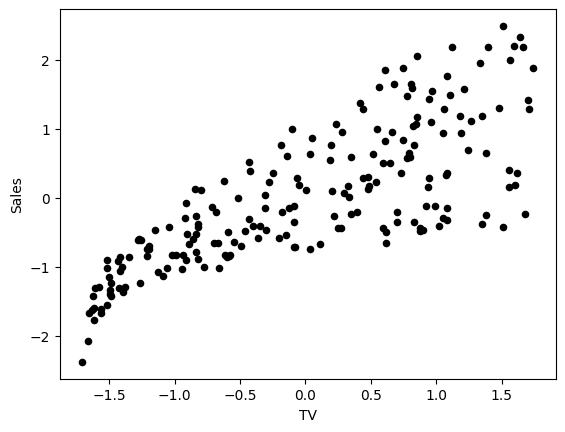

In [28]:
# Do a column-wise normalization of dataset
adv_norm = (adv - adv.mean()) / adv.std()
adv_norm.plot(x="TV", y="Sales", kind="scatter", c="black");

In [29]:
X_norm = adv_norm["TV"]
Y_norm = adv_norm["Sales"]
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print(f"The shape of X_norm: {X_norm.shape}")
print(f"The shape of Y_norm: {Y_norm.shape}")

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)


In [30]:
parameters = nn_model(X_norm, Y_norm, num_iterations=10, learning_rate=1.2)
print(f"Parameters of neural network: {parameters}")

input size: 1, output size: 1
Cost after <0> iteration: 0.512177
Cost after <1> iteration: 0.205101
Cost after <2> iteration: 0.193544
Cost after <3> iteration: 0.193109
Cost after <4> iteration: 0.193093
Cost after <5> iteration: 0.193092
Cost after <6> iteration: 0.193092
Cost after <7> iteration: 0.193092
Cost after <8> iteration: 0.193092
Cost after <9> iteration: 0.193092
Parameters of neural network: {'W': array([[0.78222436]]), 'b': array([[-2.66453526e-16]])}


In [31]:
X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[[ 9.40942593 12.7369905  20.34285238]]


In [32]:
DATA_PATH2 = Path(CV_DATA_DIR, "playground", "house_prices_train.csv")

df = pd.read_csv(DATA_PATH2)
X_multi = df[["GrLivArea", "OverallQual"]]
Y_multi = df["SalePrice"]

display(X_multi)
display(Y_multi)

,GrLivArea,OverallQual
0,1710,7
1,1262,6
2,1786,7
3,1717,7
4,2198,8
...,...,...
1455,1647,6
1456,2073,6
1457,2340,7
1458,1078,5


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [33]:
X_multi_norm = (X_multi - X_multi.mean()) / X_multi.std()
Y_multi_norm = (Y_multi - Y_multi.mean()) / Y_multi.std()

# Convert results to the NumPy arrays, transpose X to get shape (2, m) and reshape Y to get (1, m)
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print("X_multi_norm", X_multi_norm)
print("Y_multi_norm", Y_multi_norm)

print(f"The shape of X_norm: {X_multi_norm.shape}")
print(f"The shape of Y_norm: {Y_multi_norm.shape}")

X_multi_norm [[ 0.37020659 -0.48234664  0.51483616 ...  1.56910958 -0.83250243
  -0.49376477]
 [ 0.6512561  -0.07181151  0.6512561  ...  0.6512561  -0.79487911
  -0.79487911]]
Y_multi_norm [[ 0.34715427  0.00728582  0.53597007 ...  1.07724204 -0.48835566
  -0.42069666]]
The shape of X_norm: (2, 1460)
The shape of Y_norm: (1, 1460)


In [23]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, learning_rate=1.2)
print(f"Parameters of neural network: {parameters_multi}")

input size: 2, output size: 1
Cost after <0> iteration: 0.495816
Cost after <1> iteration: 0.432889
Cost after <2> iteration: 0.382544
Cost after <3> iteration: 0.341298
Cost after <4> iteration: 0.307243
Cost after <5> iteration: 0.279056
Cost after <6> iteration: 0.255708
Cost after <7> iteration: 0.236362
Cost after <8> iteration: 0.220333
Cost after <9> iteration: 0.20705
Cost after <10> iteration: 0.196043
Cost after <11> iteration: 0.186922
Cost after <12> iteration: 0.179364
Cost after <13> iteration: 0.173101
Cost after <14> iteration: 0.167912
Cost after <15> iteration: 0.163611
Cost after <16> iteration: 0.160048
Cost after <17> iteration: 0.157095
Cost after <18> iteration: 0.154648
Cost after <19> iteration: 0.152621
Cost after <20> iteration: 0.15094
Cost after <21> iteration: 0.149548
Cost after <22> iteration: 0.148395
Cost after <23> iteration: 0.147439
Cost after <24> iteration: 0.146646
Cost after <25> iteration: 0.14599
Cost after <26> iteration: 0.145446
Cost after 

In [36]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T
Y_pred_multi = predict(X_multi, Y_multi, parameters_multi, X_pred_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1-10:
[7 6 8]
Predictions of sales price, $:
[[221358. 160046. 281554.]]
